## Imports

Begin by importing the required libraries.

In [81]:
!pip install pandas
!pip install seaborn
!pip install matplotlib

In [82]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

Import all the generated datasets.

In [83]:
VaryArraySize = pd.read_csv("./datasets/VaryingArraySize.csv", header=0)
VaryArraySizeMerge = pd.read_csv("./datasets/VaryingArraySizeMerge.csv", header=0)
VaryThresholdSize1 = pd.read_csv("./datasets/VaryingThresholdSize1.csv", header=0)
VaryThresholdSize2 = pd.read_csv("./datasets/VaryingThresholdSize2.csv", header=0)
VaryThresArraySize1 = pd.read_csv("./datasets/VaryingThresholdArraySize1.csv", header=0)
VaryThresArraySize2 = pd.read_csv("./datasets/VaryingThresholdArraySize2.csv", header=0)
RepeatedMerge = pd.read_csv("./datasets/RepeatedMerge.csv", header=0)
OptimalS = pd.read_csv("./datasets/OptimalSBenchmark.csv", header=0)
OptimalSDifArraySize = pd.read_csv("./datasets/OptimalSDiffArraySize.csv", header=0)

## Analysis Part 1

Begin by plotting the number of key comparisons against the array size.

[Text(0.5, 1.0, 'Number of Key Comparisons against Array Size for S = 43\nComparison Plot of Hybrid vs Pure Merge Sort Algorithm')]

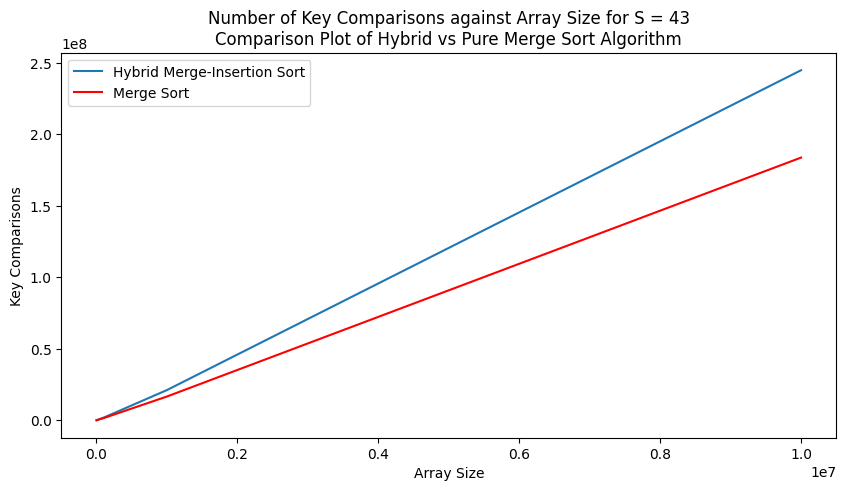

In [84]:
plt.figure(figsize=(10,5))

plot = sb.lineplot(data= VaryArraySize, x="Array Size", y="Key Comparisons", label="Hybrid Merge-Insertion Sort")
sb.lineplot(data= VaryArraySizeMerge, x="Array Size", y="Key Comparisons", label="Merge Sort", color="red")

plot.set(title="Number of Key Comparisons against Array Size for S = 43\nComparison Plot of Hybrid vs Pure Merge Sort Algorithm")

Followed by the elapsed time against array size.

[Text(0.5, 1.0, 'Elapsed Time against Array Size for S = 43\nComparison Plot of Hybrid vs Pure Merge Sort Algorithm')]

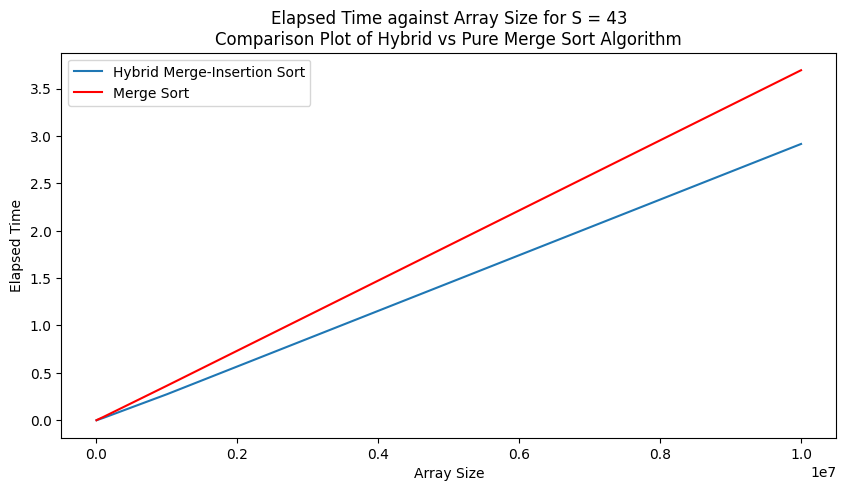

In [85]:
plt.figure(figsize=(10,5))

plot = sb.lineplot(data= VaryArraySize, x="Array Size", y="Elapsed Time", label="Hybrid Merge-Insertion Sort")
sb.lineplot(data= VaryArraySizeMerge, x="Array Size", y="Elapsed Time", label="Merge Sort", color="red")

plot.set(title="Elapsed Time against Array Size for S = 43\nComparison Plot of Hybrid vs Pure Merge Sort Algorithm")

The Merge Sort algorithm has a time complexity of ***O(n log n)*** for all scenarios whereas the Insertion Sort algorithm has a time complexity of ***O(n)*** for best-case and ***O(n<sup>2</sup>)*** for average-case and worst-case. 

The hybrid Merge-Insertion Sort algorithm involves the following key steps:
1. Perform normal Merge Sort operation on the array of length *n*.
2. If the array length is smaller than *s*, switch to Insertion Sort.


***<u>Insertion Sort</u>***

We are performing Insertion-Sort on *n*/*s* number of arrays, each of length *s*. 

Worst and average-case analysis
> θ (*s*<sup>2</sup>) on *n*/*s* number of arrays. <br>
> Therefore, time complexity for worst and average-case is θ (*ns*).

Best-case analysis
> θ (*s*) on *n*/*s* number of arrays. <br>
> Therefore, time complexity for worst and average-case is θ (*n*).

***<u>Merge Sort</u>***

After Insertion-Sort is done, the ***merge*** method is a bottom-up approach to merge the sorted arrays together. We call the ***merge*** method for *log*<sub>2</sub>(*n*/*s*) levels and each level compares *n* elements.

All cases analysis
> θ (*log*<sub>2</sub>(*n*/*s*) levels with *n* elements each.
> Therefore, time complexity for all cases is θ (*n* *log* (*n*/*s*))


***<u>Hybrid Merge-Insertion Sort</u>***

The total time complexity for best-case analysis is: θ (*n* + *n* *log* (*n*/*s*)).

The total time complexity for worst and average-case analysis is: θ (*ns* + *n* *log* (*n*/*s*))

When ***s*** is fixed, the asymptotic notation of the hybrid Merge-Insertion Sort algorithm simplifies to θ (*n* + *n log* (*n*)) = θ (*n log* (*n*)), which is equivalent to the asymptotic notation of Merge Sort algorithm.

From the plots, we see that the the number of key comparisons done by the hybrid Merge-Insertion Sort algorithm is higher than the Merge Sort algorithm as expected since the time complexity of Merge Sort has an additional *n* factor which is ommited in the asymptotic notation. 


The similar order of growth between Merge Sort and the hybrid Merge-Insertion Sort algorithm from the comparison plots proves that the empirical data obtained satisfies the theoretical time complexity of θ (*n log* (*n*)).


However, since the Merge-Insertion Sort algorithm incorporated the Insertion Sort algorithm, which has a low constant factor, the elapsed time of using Merge-Insertion Sort algorithm is noticeably shorter than using Merge Sort algorithm when *n* is very large, as shown in the comparison plot.

## Analysis Part 2

Begin by plotting the number of key comparisons against threshold size.

[Text(0.5, 1.0, 'Number of Key Comparisons against Threshold Size for Array Size = 10 mil\nThreshold Size increments by 1')]

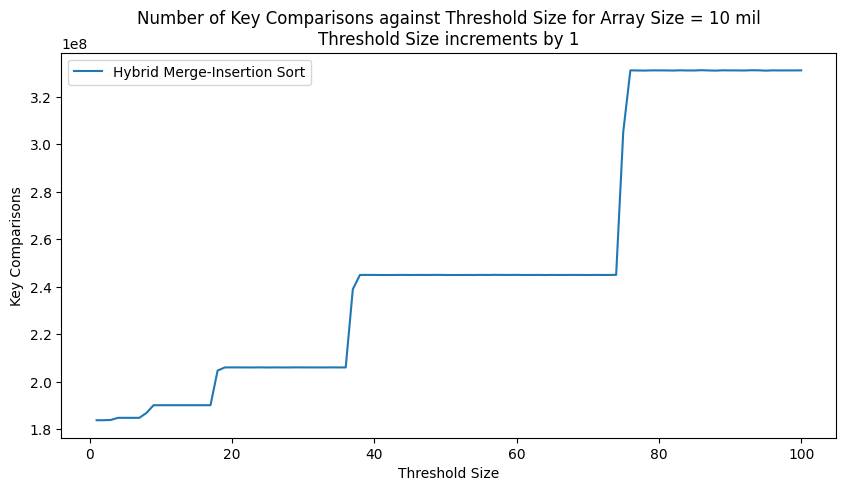

In [86]:
plt.figure(figsize=(10,5))

plot = sb.lineplot(data= VaryThresholdSize1, x="Threshold Size", y="Key Comparisons", label="Hybrid Merge-Insertion Sort")

plot.set(title="Number of Key Comparisons against Threshold Size for Array Size = 10 mil\nThreshold Size increments by 1")

Followed by the elapsed time against threshold size.

[Text(0.5, 1.0, 'Elapsed Time against Threshold Size for Array Size = 10 mil\nThreshold Size increments by 1')]

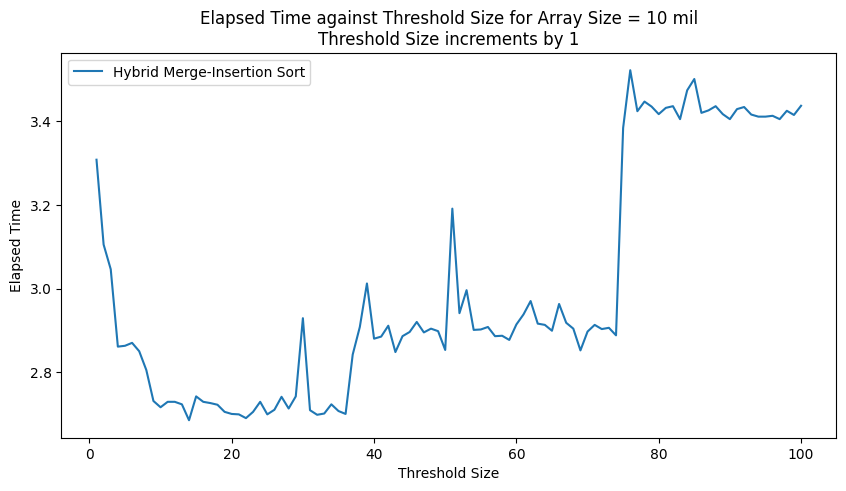

In [87]:
plt.figure(figsize=(10,5))

plot = sb.lineplot(data= VaryThresholdSize1, x="Threshold Size", y="Elapsed Time", label="Hybrid Merge-Insertion Sort")

plot.set(title="Elapsed Time against Threshold Size for Array Size = 10 mil\nThreshold Size increments by 1")

From Part 1 we have determined that for the hybrid Merge-Insertion Sort algorithm:

> The total time complexity for best-case analysis is: θ (*n* + *n* *log* (*n*/*s*)).
> <br>
> The total time complexity for worst and average-case analysis is: θ (*ns* + *n* *log* (*n*/*s*))

With the value of *n* fixed, the time complexity is simplified to θ (*log* *s*) for best-case and θ (*s* - *log* *s*) = θ (*s*) for average and worst-case. We consider only the average and worst-case here.

The plot of number of key comparisons against the threshold size *s* presents a staircase pattern. This can be explained as follows:

>Consider an array of size *n*, and set the threshold to be *s* = *n*/*k*. The following binary tree structure illustrates the top-down approach of *mergesort* method.

> <img src="./media/Illustration.png">


When the *mergesort* method splits the array into *k* *n*/*k*-sized subarrays, the Insertion Sort method is called since the array size is now ≤ *s*.

Now suppose we change the value of *s* to be such that 2*n*/*k* < *s* < *n*/*k*. Notice that since subarray of size 2*n*/*k* is bigger than *s*, the Insertion Sort algorithm will still be called on the level of array size *n*/*k*.

Now suppose we change the value of *s* to be 2*n*/*k*. Then, the Insertion Sort aalgorithm will be invoked on the level of array size 2*n*/*k* instead. 

This shows that whenever the value of *s* is strictly between the array size of two adjacent levels in the binary tree structure, the number of Insertion Sort method called is approximately the same (*approximately* due to random dataset) => the number of key comparisons is approximately the same. 

This explains the staircase pattern shown in the plot, where the **leveled** region is when 2*n*/*k* ≤ *s* ≤ *n*/*k* and the **spike** region is when *s* = 2*n*/*k* or *s* = *n*/*k*.

Following our evaluation, if we plot the comparison plot using values of *s* for all *s* in the set {*s* | *s* = *n*/2<sup>*k*</sup>} instead, the plot will then show a linear-time graph, as predicted in the time complexity analysis of θ (*s*).

[Text(0.5, 1.0, 'Number of Key Comparisons against Threshold Size for Array Size = 10 mil\nThreshold Size increments by multiples of 2')]

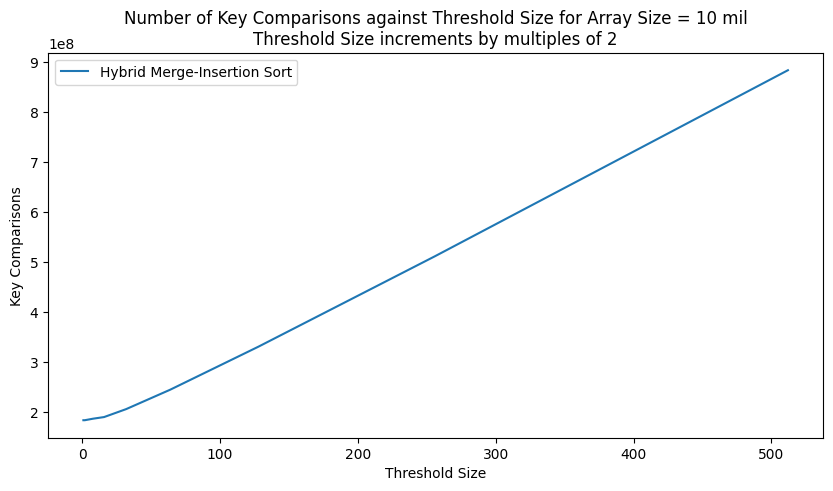

In [88]:
plt.figure(figsize=(10,5))

plot = sb.lineplot(data= VaryThresholdSize2, x="Threshold Size", y="Key Comparisons", label="Hybrid Merge-Insertion Sort")

plot.set(title="Number of Key Comparisons against Threshold Size for Array Size = 10 mil\nThreshold Size increments by multiples of 2")

[Text(0.5, 1.0, 'Elapsed Time against Threshold Size for Array Size = 10 mil\nThreshold Size increments by multiples of 2')]

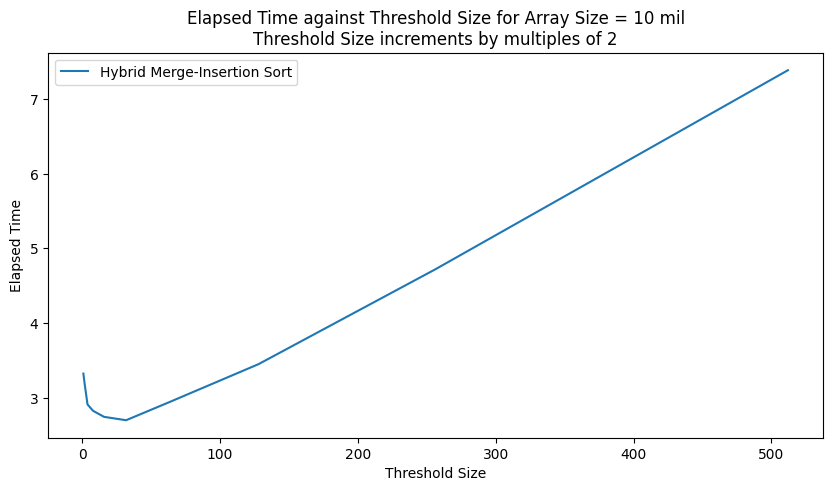

In [89]:
plt.figure(figsize=(10,5))

plot = sb.lineplot(data= VaryThresholdSize2, x="Threshold Size", y="Elapsed Time", label="Hybrid Merge-Insertion Sort")

plot.set(title="Elapsed Time against Threshold Size for Array Size = 10 mil\nThreshold Size increments by multiples of 2")

## Analysis Part 3

Begin by plotting the number of key comparisons against threshold size.

[Text(0.5, 1.0, 'Key Comparisons against Threshold Size for Array Size = 10000000\nThreshold Size increments by 1')]

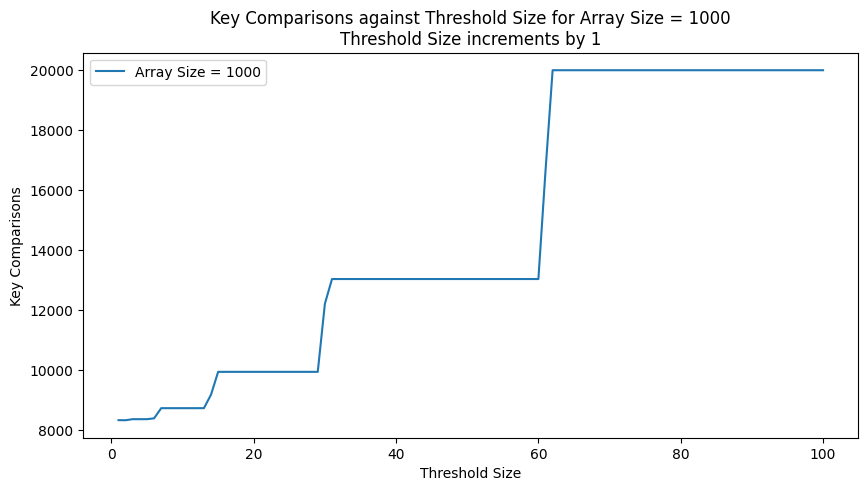

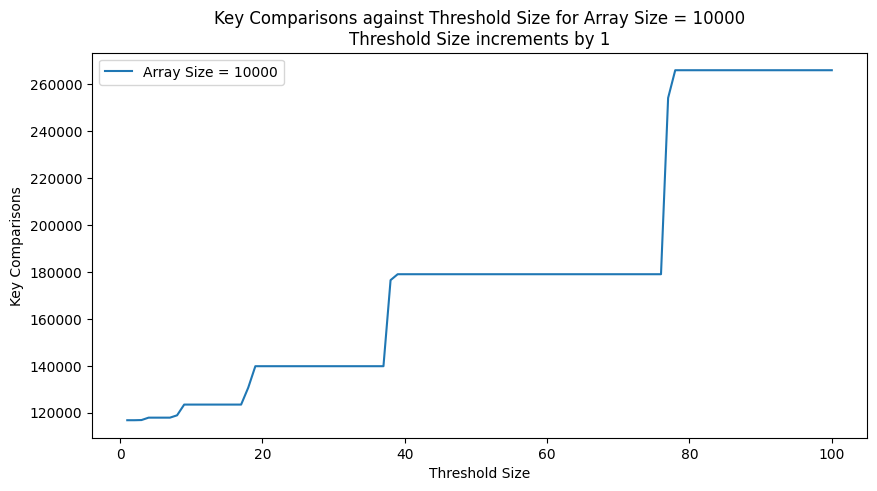

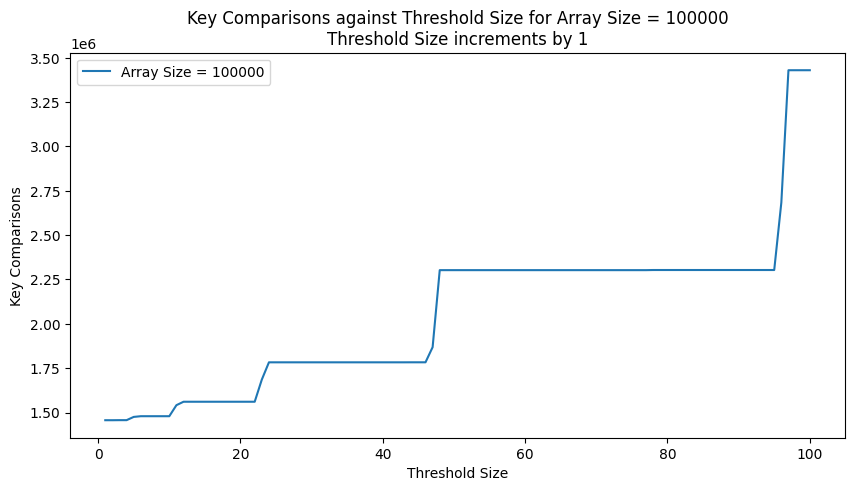

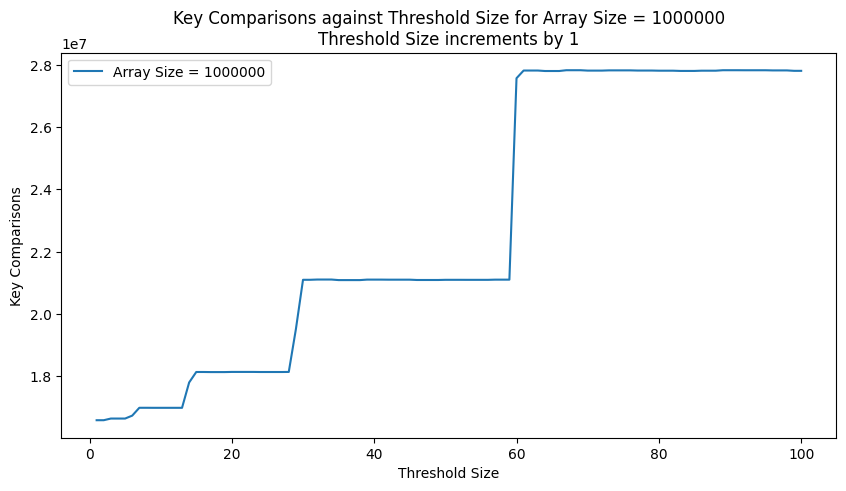

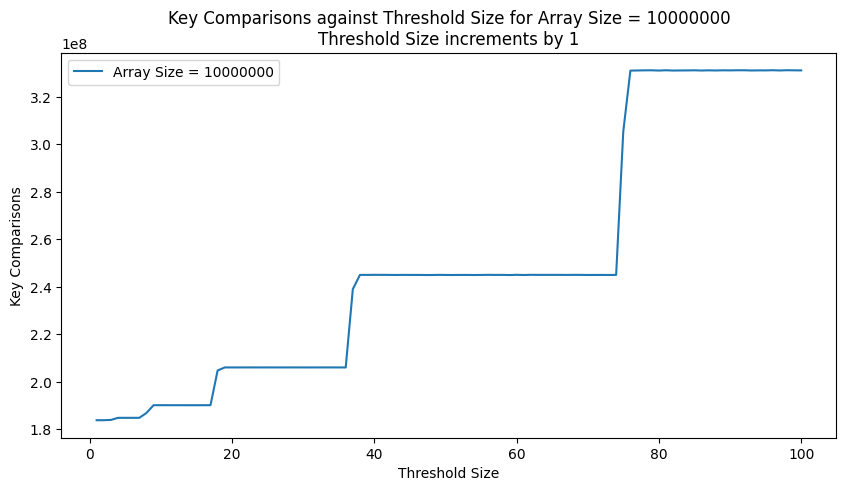

In [90]:
plt.figure(figsize=(10,5))
df = VaryThresArraySize1[VaryThresArraySize1['Array Size'] == 1000]
plot = sb.lineplot(df, x="Threshold Size", y="Key Comparisons", label="Array Size = 1000")
plot.set(title="Key Comparisons against Threshold Size for Array Size = 1000\nThreshold Size increments by 1")

plt.figure(figsize=(10,5))
df = VaryThresArraySize1[VaryThresArraySize1['Array Size'] == 10000]
plot = sb.lineplot(df, x="Threshold Size", y="Key Comparisons", label="Array Size = 10000")
plot.set(title="Key Comparisons against Threshold Size for Array Size = 10000\nThreshold Size increments by 1")

plt.figure(figsize=(10,5))
df = VaryThresArraySize1[VaryThresArraySize1['Array Size'] == 100000]
plot = sb.lineplot(df, x="Threshold Size", y="Key Comparisons", label="Array Size = 100000")
plot.set(title="Key Comparisons against Threshold Size for Array Size = 100000\nThreshold Size increments by 1")

plt.figure(figsize=(10,5))
df = VaryThresArraySize1[VaryThresArraySize1['Array Size'] == 1000000]
plot = sb.lineplot(df, x="Threshold Size", y="Key Comparisons", label="Array Size = 1000000")
plot.set(title="Key Comparisons against Threshold Size for Array Size = 1000000\nThreshold Size increments by 1")

plt.figure(figsize=(10,5))
df = VaryThresArraySize1[VaryThresArraySize1['Array Size'] == 10000000]
plot = sb.lineplot(df, x="Threshold Size", y="Key Comparisons", label="Array Size = 10000000")
plot.set(title="Key Comparisons against Threshold Size for Array Size = 10000000\nThreshold Size increments by 1")

[Text(0.5, 1.0, 'Key Comparisons against Threshold Size for Array Size = 10000000\nThreshold Size increments by multples of 2')]

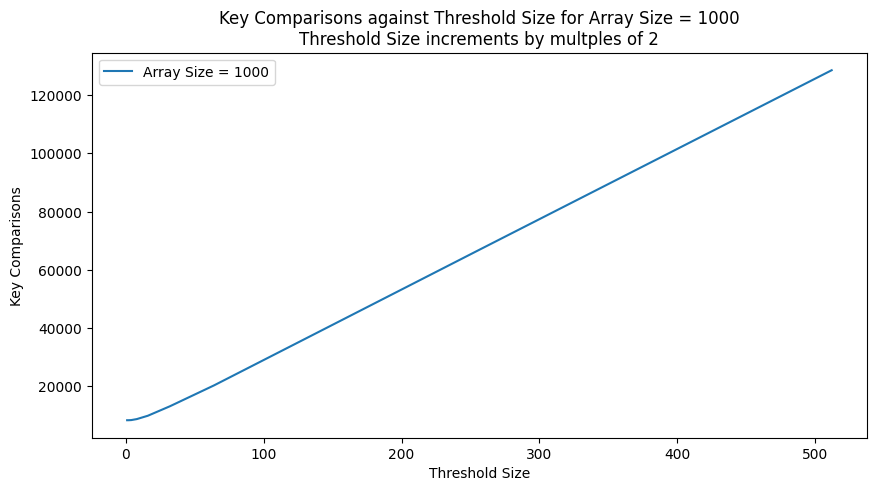

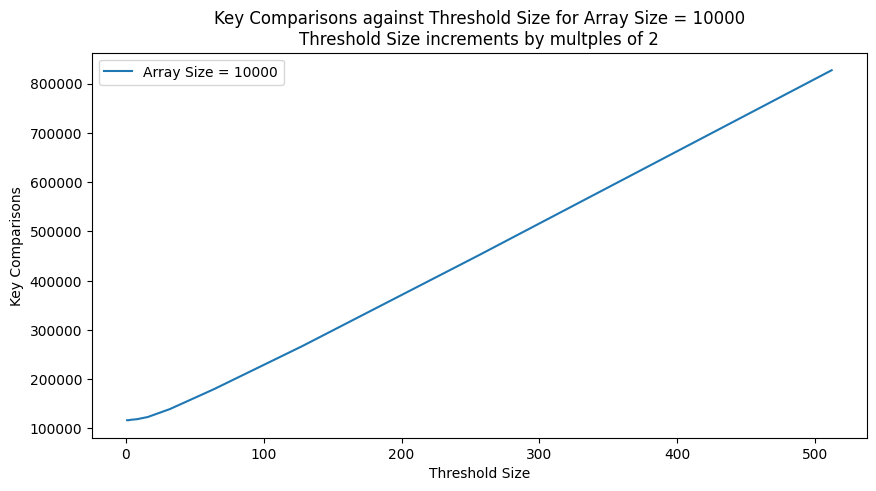

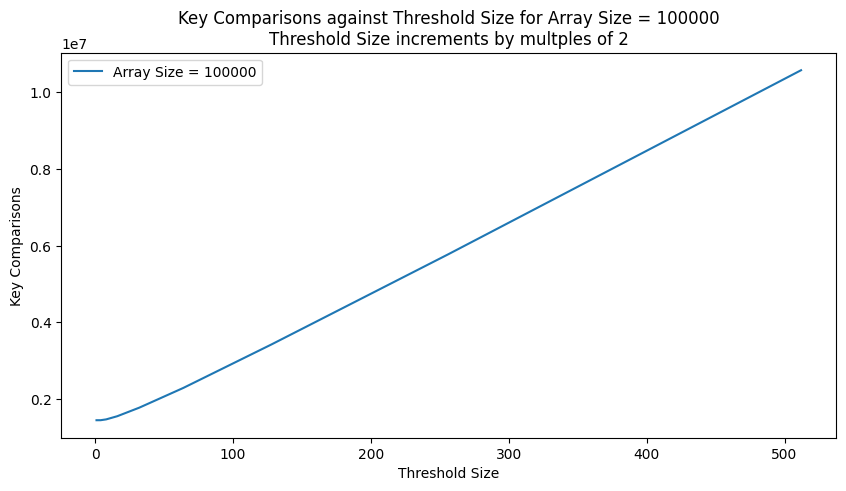

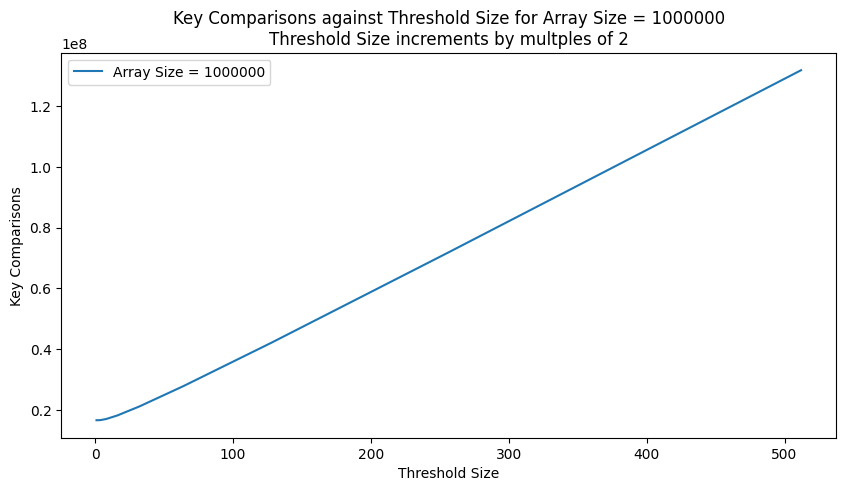

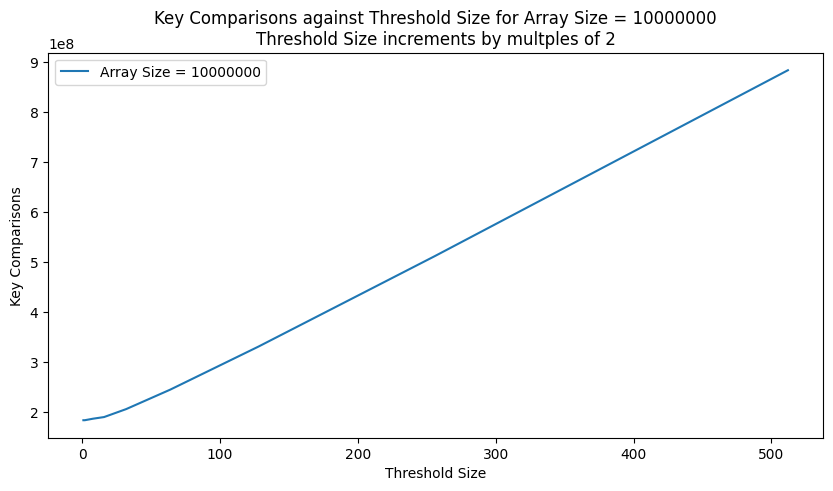

In [91]:
plt.figure(figsize=(10,5))
df = VaryThresArraySize2[VaryThresArraySize2['Array Size'] == 1000]
plot = sb.lineplot(df, x="Threshold Size", y="Key Comparisons", label="Array Size = 1000")
plot.set(title="Key Comparisons against Threshold Size for Array Size = 1000\nThreshold Size increments by multples of 2")

plt.figure(figsize=(10,5))
df = VaryThresArraySize2[VaryThresArraySize2['Array Size'] == 10000]
plot = sb.lineplot(df, x="Threshold Size", y="Key Comparisons", label="Array Size = 10000")
plot.set(title="Key Comparisons against Threshold Size for Array Size = 10000\nThreshold Size increments by multples of 2")

plt.figure(figsize=(10,5))
df = VaryThresArraySize2[VaryThresArraySize2['Array Size'] == 100000]
plot = sb.lineplot(df, x="Threshold Size", y="Key Comparisons", label="Array Size = 100000")
plot.set(title="Key Comparisons against Threshold Size for Array Size = 100000\nThreshold Size increments by multples of 2")

plt.figure(figsize=(10,5))
df = VaryThresArraySize2[VaryThresArraySize2['Array Size'] == 1000000]
plot = sb.lineplot(df, x="Threshold Size", y="Key Comparisons", label="Array Size = 1000000")
plot.set(title="Key Comparisons against Threshold Size for Array Size = 1000000\nThreshold Size increments by multples of 2")

plt.figure(figsize=(10,5))
df = VaryThresArraySize2[VaryThresArraySize2['Array Size'] == 10000000]
plot = sb.lineplot(df, x="Threshold Size", y="Key Comparisons", label="Array Size = 10000000")
plot.set(title="Key Comparisons against Threshold Size for Array Size = 10000000\nThreshold Size increments by multples of 2")

Followed by the elapsed time against threshold size.

[Text(0.5, 1.0, 'Elapsed Time against Threshold Size for Array Size = 10000000\nThreshold Size increments by multiples of 2')]

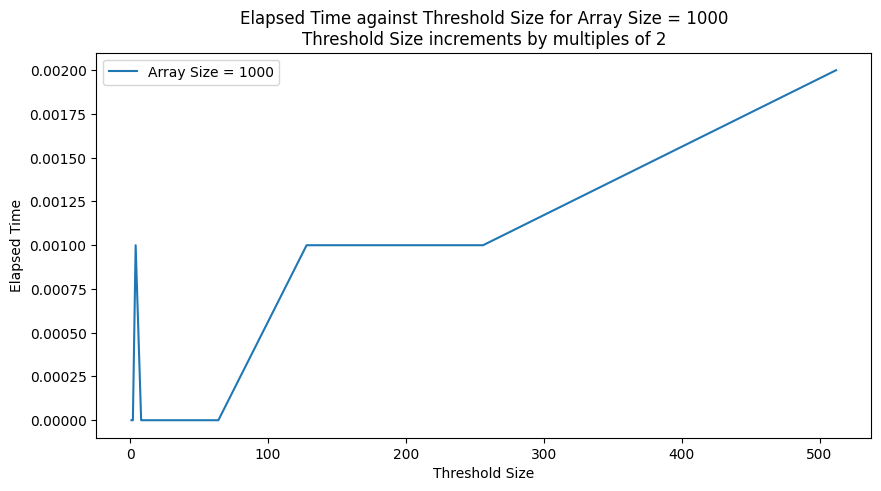

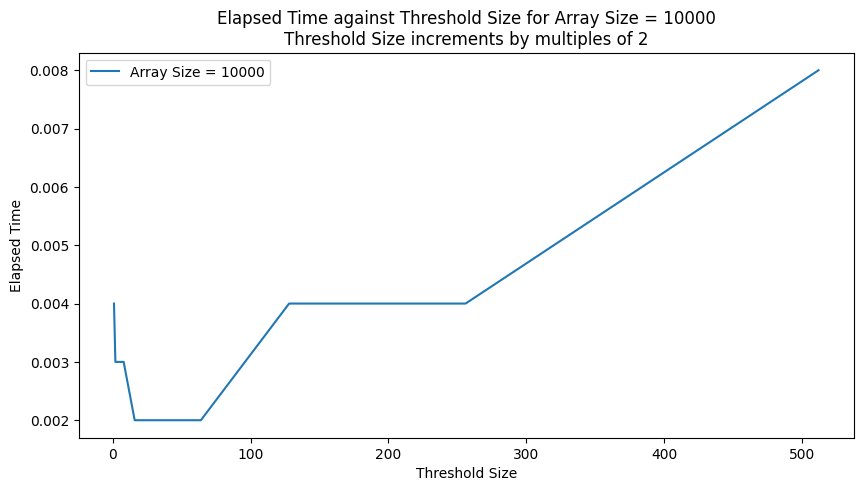

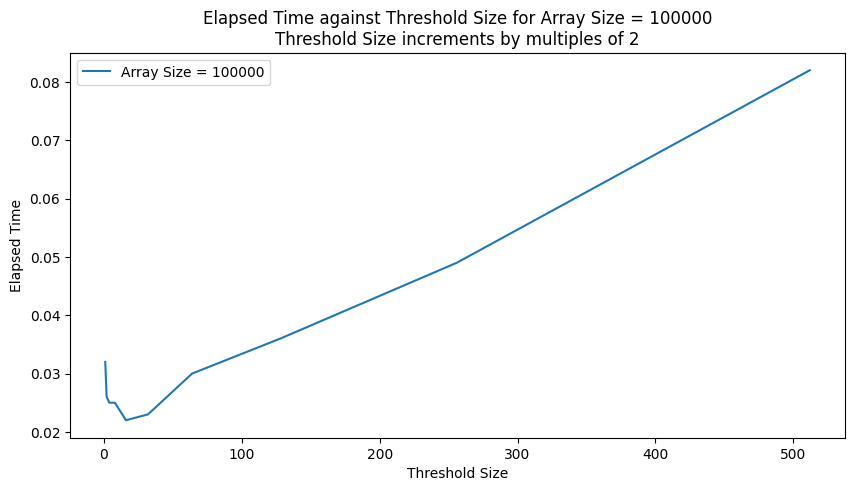

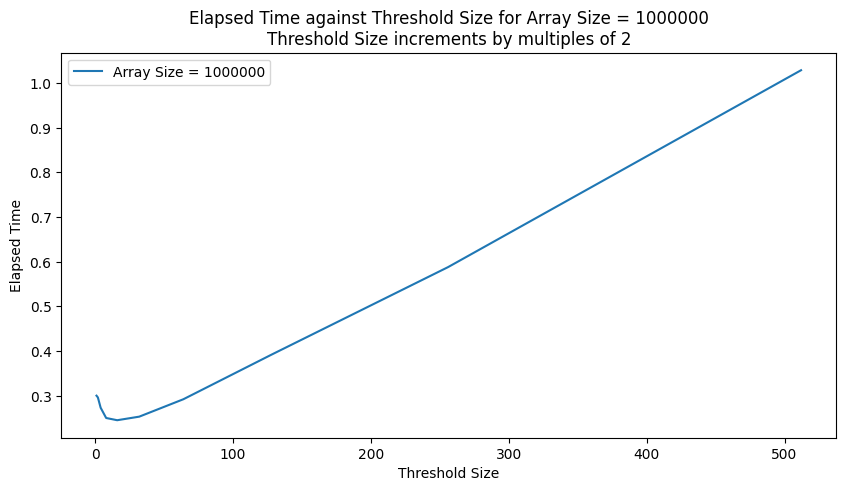

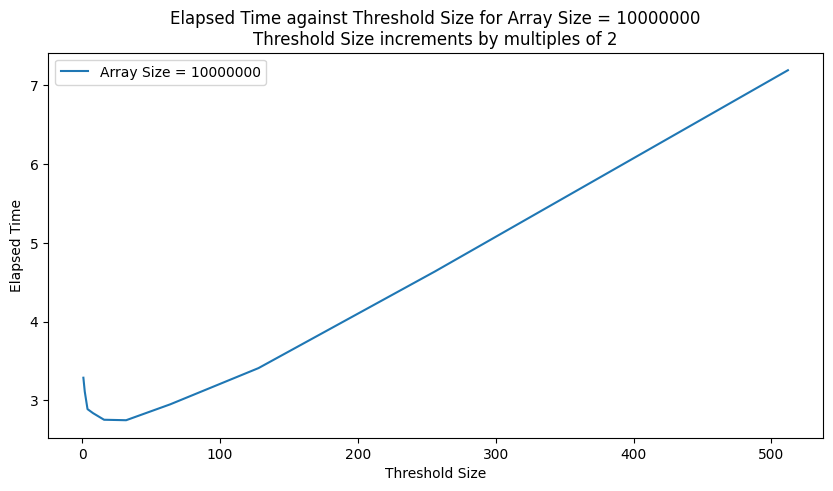

In [92]:
plt.figure(figsize=(10,5))
df = VaryThresArraySize2[VaryThresArraySize2['Array Size'] == 1000]
plot = sb.lineplot(df, x="Threshold Size", y="Elapsed Time", label="Array Size = 1000")
plot.set(title="Elapsed Time against Threshold Size for Array Size = 1000\nThreshold Size increments by multiples of 2")

plt.figure(figsize=(10,5))
df = VaryThresArraySize2[VaryThresArraySize2['Array Size'] == 10000]
plot = sb.lineplot(df, x="Threshold Size", y="Elapsed Time", label="Array Size = 10000")
plot.set(title="Elapsed Time against Threshold Size for Array Size = 10000\nThreshold Size increments by multiples of 2")

plt.figure(figsize=(10,5))
df = VaryThresArraySize2[VaryThresArraySize2['Array Size'] == 100000]
plot = sb.lineplot(df, x="Threshold Size", y="Elapsed Time", label="Array Size = 100000")
plot.set(title="Elapsed Time against Threshold Size for Array Size = 100000\nThreshold Size increments by multiples of 2")

plt.figure(figsize=(10,5))
df = VaryThresArraySize2[VaryThresArraySize2['Array Size'] == 1000000]
plot = sb.lineplot(df, x="Threshold Size", y="Elapsed Time", label="Array Size = 1000000")
plot.set(title="Elapsed Time against Threshold Size for Array Size = 1000000\nThreshold Size increments by multiples of 2")

plt.figure(figsize=(10,5))
df = VaryThresArraySize2[VaryThresArraySize2['Array Size'] == 10000000]
plot = sb.lineplot(df, x="Threshold Size", y="Elapsed Time", label="Array Size = 10000000")
plot.set(title="Elapsed Time against Threshold Size for Array Size = 10000000\nThreshold Size increments by multiples of 2")

We see that the elapsed time becomes a linear-time graph as threshold size is bigger than around 100. Therefore, the optimal threshold size should lie within [0, 100]. We shall examine this range close-up.

[Text(0.5, 1.0, 'Elapsed Time against Threshold Size for Array Size = 10000000\nThreshold Size increments by 1')]

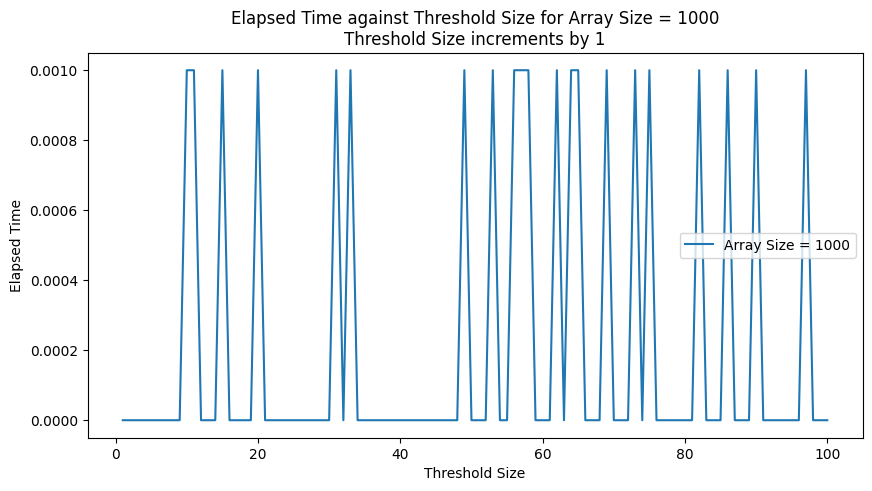

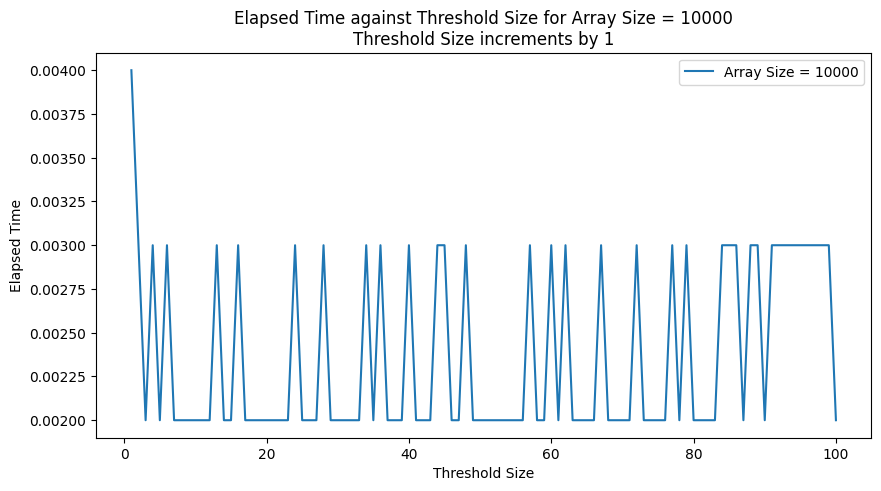

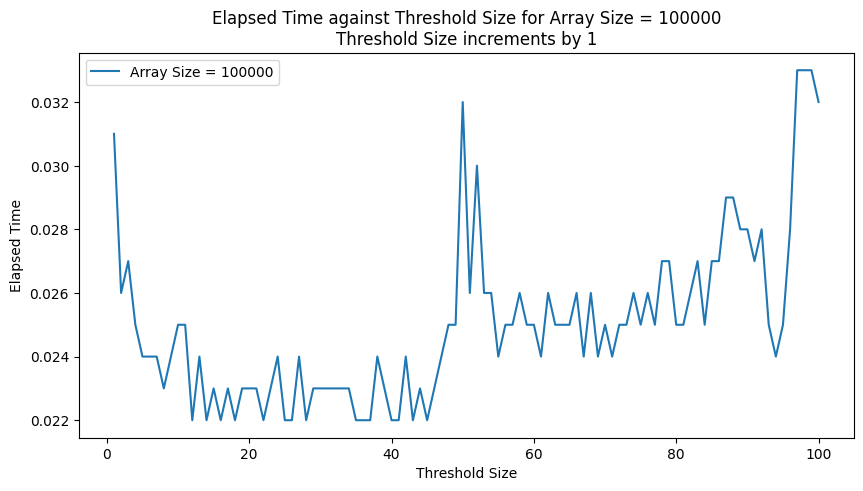

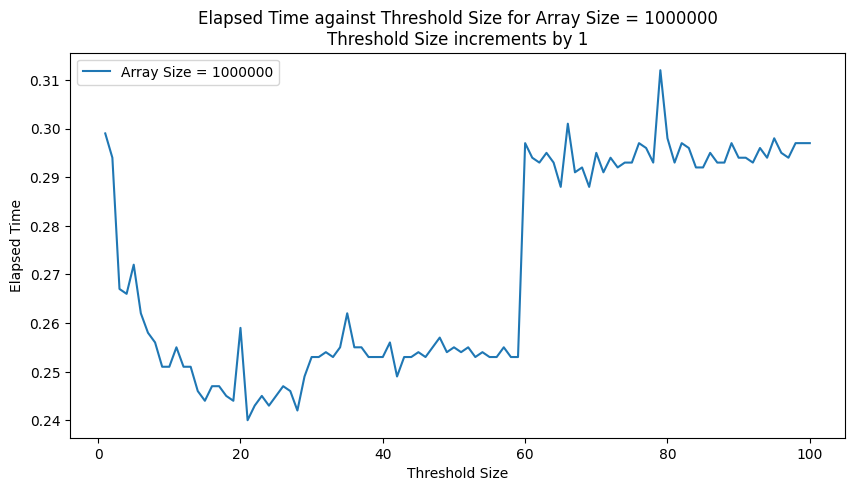

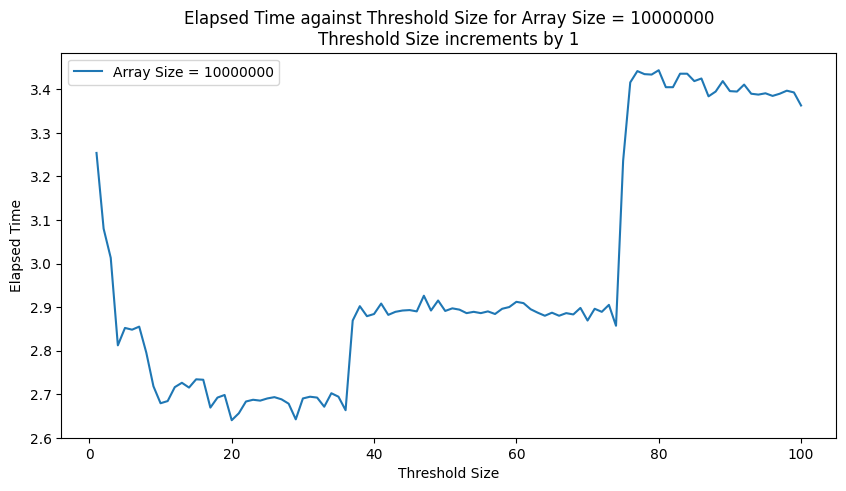

In [93]:
plt.figure(figsize=(10,5))
df = VaryThresArraySize1[VaryThresArraySize1['Array Size'] == 1000]
plot = sb.lineplot(df, x="Threshold Size", y="Elapsed Time", label="Array Size = 1000")
plot.set(title="Elapsed Time against Threshold Size for Array Size = 1000\nThreshold Size increments by 1")

plt.figure(figsize=(10,5))
df = VaryThresArraySize1[VaryThresArraySize1['Array Size'] == 10000]
plot = sb.lineplot(df, x="Threshold Size", y="Elapsed Time", label="Array Size = 10000")
plot.set(title="Elapsed Time against Threshold Size for Array Size = 10000\nThreshold Size increments by 1")

plt.figure(figsize=(10,5))
df = VaryThresArraySize1[VaryThresArraySize1['Array Size'] == 100000]
plot = sb.lineplot(df, x="Threshold Size", y="Elapsed Time", label="Array Size = 100000")
plot.set(title="Elapsed Time against Threshold Size for Array Size = 100000\nThreshold Size increments by 1")

plt.figure(figsize=(10,5))
df = VaryThresArraySize1[VaryThresArraySize1['Array Size'] == 1000000]
plot = sb.lineplot(df, x="Threshold Size", y="Elapsed Time", label="Array Size = 1000000")
plot.set(title="Elapsed Time against Threshold Size for Array Size = 1000000\nThreshold Size increments by 1")

plt.figure(figsize=(10,5))
df = VaryThresArraySize1[VaryThresArraySize1['Array Size'] == 10000000]
plot = sb.lineplot(df, x="Threshold Size", y="Elapsed Time", label="Array Size = 10000000")
plot.set(title="Elapsed Time against Threshold Size for Array Size = 10000000\nThreshold Size increments by 1")

Now we see how Merge Sort performs against the hybrid algorithm for array size = 10 mil.

C:\Users\juinl\AppData\Local\Temp\ipykernel_7944\1485792212.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time Difference'] = time_dif


[Text(0.5, 1.0, 'Elapsed Time Difference of Hybrid vs Pure Merge Sort Algorithm against Threshold Size for Array Size = 10 mil')]

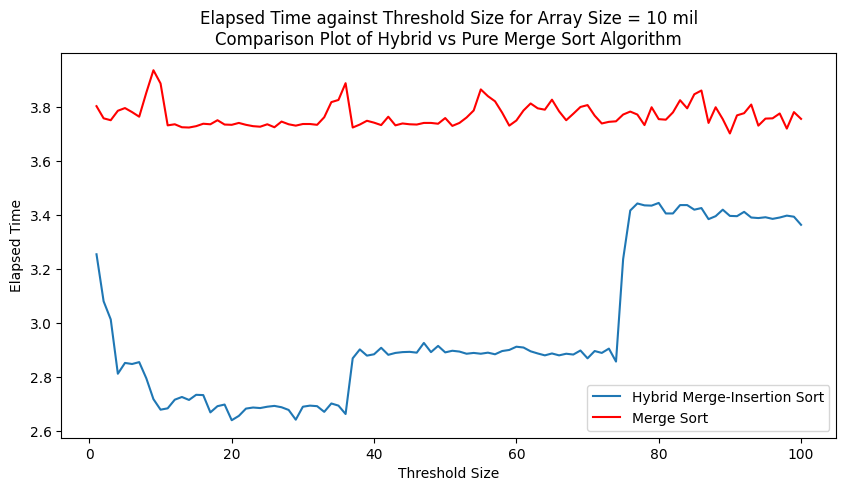

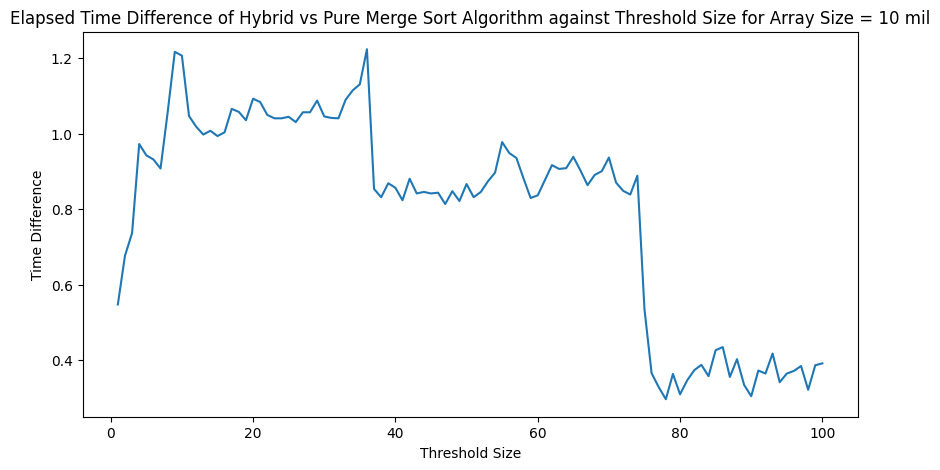

In [94]:
time_dif = list()
df = VaryThresArraySize1[VaryThresArraySize1['Array Size'] == 10000000]

count = 0
for i in df["Elapsed Time"]:
    time_dif.append(RepeatedMerge["Elapsed Time"][count] - i)
    count += 1
df['Time Difference'] = time_dif

plt.figure(figsize=(10,5))
plot = sb.lineplot(data= df, x="Threshold Size", y="Elapsed Time", label="Hybrid Merge-Insertion Sort")
sb.lineplot(data= RepeatedMerge, x="Threshold Size", y="Elapsed Time", label="Merge Sort", color="red")
plot.set(title="Elapsed Time against Threshold Size for Array Size = 10 mil\nComparison Plot of Hybrid vs Pure Merge Sort Algorithm")

plt.figure(figsize=(10,5))
plot = sb.lineplot(data= df, x="Threshold Size", y="Time Difference")
plot.set(title="Elapsed Time Difference of Hybrid vs Pure Merge Sort Algorithm against Threshold Size for Array Size = 10 mil")

Based on the elapsed time difference graph, we observe that **there is no one obvious optimal threshold**, but **a region of minimum elapsed time around 10 to 40**, from the datasets generated.

However, we believe that the optimal *s* value is system-dependant as:
* It is affected by the CPU clock speed and architecure.
* It is affected by the programming language used as lower-level programming language such as C is more efficient than higher-level programming languages such as Python.
* It is affected by the compiler used.
* Instructions from other programs may be running concurrently with the algorithm which is infeasible to determine. 
* It is affected by the randomness of our dataset. Each program run will generate a different dataset. Some dataset may be more optimised, or less, due to the randomness nature.

Therefore, on our system, we take the mid-point of *s* = 25 to be our optimal *s* value for comparison in the final analysis.

*We used an AMD Ryzen 5 CPU built on the AMD x86-x64 architecture, running at approximately 2.5Ghz clock speed, and the program is programmed in C17 standard, compiled using GNU GCC compiler.*

## Algorithm Comparison

Using our optimal value of S, we attempt to compare the hybrid Merge Insertion-Sort algorithm with the Merge Sort algorithm.

In [102]:
df = OptimalS[OptimalS['Algorithm'] == 'Merge-Insertion Sort']
sum_key_comparisons = 0
count = 0
for j in df['Key Comparisons']:
    count += 1
    sum_key_comparisons += int(j)
avg_key1 = sum_key_comparisons / 20
print("The average number of key comparsions for Merge-Insertion Sort in 20 trials is", avg_key1)

sum_execution_time = 0.0
for j in df['Elapsed Time']:
    sum_execution_time += float(j)
avg_time1 = round(float (sum_execution_time / 20), 2)
print("The average elapsed time for Merge-Insertion Sort in 20 trials is %.2fs" %avg_time1)

print("\n")
df = OptimalS[OptimalS['Algorithm'] == 'Merge Sort']
sum_key_comparisons = 0
for j in df['Key Comparisons']:
    sum_key_comparisons += int(j)
avg_key2 = sum_key_comparisons / 20
print("The average number of key comparsions for Merge Sort in 20 trials is", avg_key2)

sum_execution_time = 0.0
for j in df['Elapsed Time']:
    sum_execution_time += float(j)
avg_time2 = round(float (sum_execution_time / 20), 2)
print("The average elapsed time for Merge Sort in 20 trials is %.2fs" %avg_time2)

_key_comparisons = (float(avg_key1 /avg_key2) - 1) * 100
_time = float(avg_time2 - avg_time1) / avg_time2 * 100

print("\n\nThe hybrid Merge-Insertion Sort algorithm with S = 25 yields a %.2f%% improvement over the Merge Sort algorithm in terms of runtime with %.2f%% more key comparisons when Array Size = 10 million." %(_time, _key_comparisons))

The average number of key comparsions for Merge-Insertion Sort in 20 trials is 206054287.7
The average execution time for Merge-Insertion Sort in 20 trials is 2.72s


The average number of key comparsions for Merge Sort in 20 trials is 183834226.5
The average execution time for Merge Sort in 20 trials is 3.73s


The hybrid Merge-Insertion Sort algorithm with S = 25 yields a 27.08% improvement over the Merge Sort algorithm in terms of runtime with 12.09% more key comparisons when Array Size = 10 million.


[Text(0.5, 1.0, 'Key Comparisons against Array Size\nComparison Plot of Hybrid vs Pure Merge Sort Algorithm')]

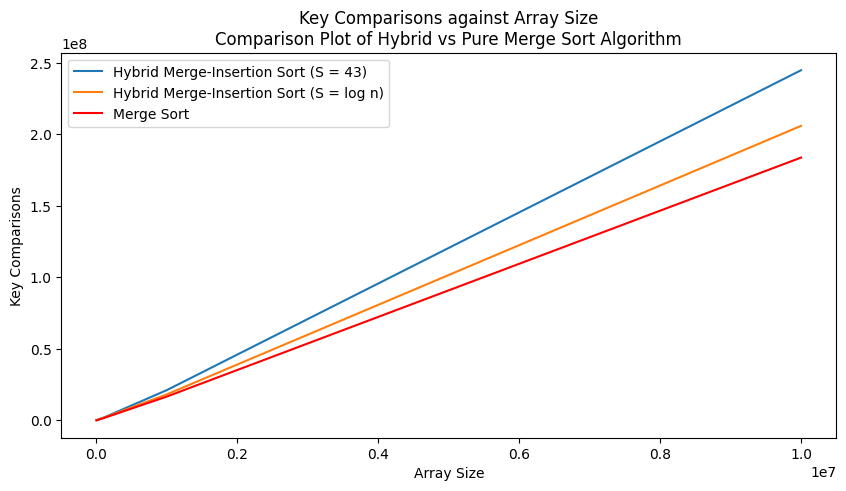

In [96]:
plt.figure(figsize=(10,5))

plot = sb.lineplot(data= VaryArraySize, x="Array Size", y="Key Comparisons", label="Hybrid Merge-Insertion Sort (S = 43)")
sb.lineplot(data= OptimalSDifArraySize, x="Array Size", y="Key Comparisons", label="Hybrid Merge-Insertion Sort (S = log n)")
sb.lineplot(data= VaryArraySizeMerge, x="Array Size", y="Key Comparisons", label="Merge Sort", color="red")

plot.set(title="Key Comparisons against Array Size\nComparison Plot of Hybrid vs Pure Merge Sort Algorithm")

[Text(0.5, 1.0, 'Elapsed Time against Array Size\nComparison Plot of Hybrid vs Pure Merge Sort Algorithm')]

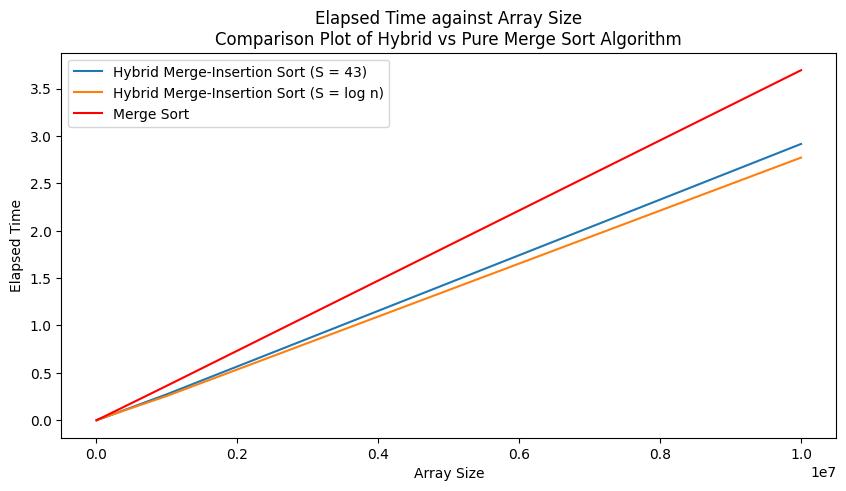

In [97]:
plt.figure(figsize=(10,5))

plot = sb.lineplot(data= VaryArraySize, x="Array Size", y="Elapsed Time", label="Hybrid Merge-Insertion Sort (S = 43)")
sb.lineplot(data= OptimalSDifArraySize, x="Array Size", y="Elapsed Time", label="Hybrid Merge-Insertion Sort (S = log n)")
sb.lineplot(data= VaryArraySizeMerge, x="Array Size", y="Elapsed Time", label="Merge Sort", color="red")

plot.set(title="Elapsed Time against Array Size\nComparison Plot of Hybrid vs Pure Merge Sort Algorithm")